In [47]:
from textblob import TextBlob
import pandas as pd
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer



# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools


# First try on TextBlob

In [61]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")

In [62]:
testimonial.sentences

[Sentence("Textblob is amazingly simple to use."), Sentence("What great fun!")]

In [5]:
df=pd.read_csv('../data/linkfree_combined.csv')

In [7]:
df.linkfree_combined[0]

'enfp intj moment sportscenter top ten play prank|||lifechanging experience life|||repeat today|||may perc experience immerse|||last thing infj friend posted facebook committing suicide next day rest peace|||hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth|||welcome stuff|||game set match|||prozac wellbrutin least thirty minute moving leg dont mean moving sitting desk chair weed moderation maybe try edible healthier alternative|||basically come three item youve determined type whichever type want would likely use given type cognitive function whatnot left|||thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim|||dear enfp favorite video game growing current favorite video game cool|||appears late sad|||there someone everyone|||wait thought confidence good thing|||cherish time solitude bc revel within inner world whereas time id workin enjoy time d

In [24]:
def tokenize_for_countvec(post):
    return post.replace('|||', ' ')

In [31]:
X = df.linkfree_combined.apply(tokenize_for_countvec)

In [34]:
blob=TextBlob(X[0])

In [35]:
blob.sentences[0].sentiment

Sentiment(polarity=0.11855453026505659, subjectivity=0.4953115743905216)

# Sentiment analysis on tweeter text

In [16]:
data=pd.read_csv('../large_data/training.1600000.processed.noemoticon.csv',header=None)

data_sample1=data[:800000].sample(10000)

data_sample2=data[800000:].sample(10000)

data_sample=data_sample1.merge(data_sample2, how='outer')

data_sample=data_sample.rename(columns={0: "target", 1: "sentence"})

Text(0.5, 1.0, 'Dataset labels distribuition')

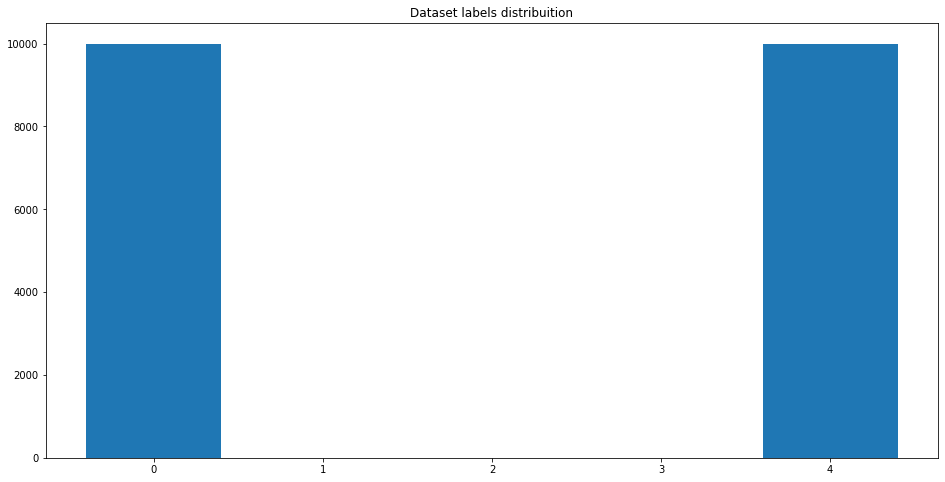

In [60]:
target_cnt = Counter(data_sample.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [95]:
data_sample.sentence[0]

"@MeshaV I kinda my old gay buds that for whateva reason I don't chill wit no more. "

In [105]:
blob1=TextBlob(data_sample.sentence[0])

In [106]:
blob1.sentiment

Sentiment(polarity=0.0888888888888889, subjectivity=0.4277777777777778)

In [118]:
def change(num):
    if num == 4:
        return 1
    return num

In [121]:
X=data_sample.sentence
y=data_sample.target.apply(change)

In [122]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [123]:
from gensim.models import Word2Vec

word2vec = Word2Vec(sentences=X_train)

In [124]:
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)

In [125]:
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed


X_train = embedding(word2vec, X_train)
X_test = embedding(word2vec, X_test)

In [126]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train, dtype='float32', padding='post', value=-1000)
X_test_pad = pad_sequences(X_test, dtype='float32', padding='post', value=-1000)

In [127]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dumb=DummyClassifier()
dumb.fit(X_train_pad,y_train)
y_pred=dumb.predict(X_test)
accuracy_score(y_pred,y_test)

0.5006666666666667

In [133]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
def init_model(units=20):
    ### YOUR CODE HERE
    model_LSTM = Sequential()
    model_LSTM.add(layers.Masking(mask_value=-1000))
    model_LSTM.add(layers.LSTM(units=units, activation='tanh'))
    model_LSTM.add(layers.Dense(10, activation='relu'))
    model_LSTM.add(layers.Dense(1, activation='sigmoid'))
    model_LSTM.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model_LSTM

In [136]:
model_LSTM =init_model(100)
es = EarlyStopping(patience=5, restore_best_weights=True)
model_LSTM.fit(X_train_pad, y_train, 
              epochs=75, 
              batch_size=32, 
              verbose=1, 
              callbacks = [es],
              validation_split=0.2)

Epoch 1/75
350/350 [==============================] - 48s 137ms/step - loss: 0.6905 - accuracy: 0.5234 - val_loss: 0.6818 - val_accuracy: 0.5511
Epoch 2/75
350/350 [==============================] - 42s 121ms/step - loss: 0.6790 - accuracy: 0.5640 - val_loss: 0.6833 - val_accuracy: 0.5704
Epoch 3/75
350/350 [==============================] - 54s 154ms/step - loss: 0.6662 - accuracy: 0.5965 - val_loss: 0.6644 - val_accuracy: 0.6068
Epoch 4/75
350/350 [==============================] - 55s 158ms/step - loss: 0.6564 - accuracy: 0.6121 - val_loss: 0.6678 - val_accuracy: 0.6032
Epoch 5/75
350/350 [==============================] - 43s 122ms/step - loss: 0.6505 - accuracy: 0.6220 - val_loss: 0.6568 - val_accuracy: 0.6214
Epoch 6/75
350/350 [==============================] - 42s 121ms/step - loss: 0.6445 - accuracy: 0.6291 - val_loss: 0.6526 - val_accuracy: 0.6250
Epoch 7/75
350/350 [==============================] - 44s 126ms/step - loss: 0.6407 - accuracy: 0.6334 - val_loss: 0.6540 - val_ac

In [137]:
model_LSTM.evaluate(X_test_pad,y_test)

188/188 [==============================] - 8s 43ms/step - loss: 0.6427 - accuracy: 0.6280


[0.6427074670791626, 0.628000020980835]

In [138]:
def init_model2(units=30):
    ### YOUR CODE HERE
    model_LSTM = Sequential()
    model_LSTM.add(layers.Masking(mask_value=-1000))
    model_LSTM.add(layers.LSTM(units=units, activation='tanh'))
    model_LSTM.add(layers.Dense(20, activation='relu'))
    model_LSTM.add(layers.Dense(10, activation='relu'))
    model_LSTM.add(layers.Dense(1, activation='sigmoid'))
    model_LSTM.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model_LSTM
model_LSTM2 =init_model2()
es = EarlyStopping(patience=5, restore_best_weights=True)
model_LSTM2.fit(X_train_pad, y_train, 
              epochs=75, 
              batch_size=32, 
              verbose=1, 
              callbacks = [es],
              validation_split=0.2)

Epoch 1/75
350/350 [==============================] - 30s 85ms/step - loss: 0.6853 - accuracy: 0.5461 - val_loss: 0.6758 - val_accuracy: 0.5757
Epoch 2/75
350/350 [==============================] - 27s 76ms/step - loss: 0.6735 - accuracy: 0.5850 - val_loss: 0.6882 - val_accuracy: 0.5354
Epoch 3/75
350/350 [==============================] - 27s 78ms/step - loss: 0.6709 - accuracy: 0.5873 - val_loss: 0.6781 - val_accuracy: 0.5561
Epoch 4/75
350/350 [==============================] - 27s 77ms/step - loss: 0.6631 - accuracy: 0.6013 - val_loss: 0.6639 - val_accuracy: 0.5993
Epoch 5/75
350/350 [==============================] - 27s 77ms/step - loss: 0.6554 - accuracy: 0.6140 - val_loss: 0.6601 - val_accuracy: 0.6114
Epoch 6/75
350/350 [==============================] - 29s 83ms/step - loss: 0.6497 - accuracy: 0.6202 - val_loss: 0.6575 - val_accuracy: 0.6096
Epoch 7/75
350/350 [==============================] - 26s 75ms/step - loss: 0.6470 - accuracy: 0.6257 - val_loss: 0.6613 - val_accuracy: